## Imports

In [1]:
import os
import re
import sys
import typing
import gc
import pandas as pd
import pickle
import logging

sys.path.append(
    os.path.join('.','src')
)

from src.models import Pipeline
from src.nodes import *

In [ ]:
logging.basicConfig(filename='logs/logs.log', level=logging.DEBUG)

# Tweets Model

In [ ]:
pipeline = Pipeline('CONFIG_MODEL_TWEETS.json', load_model_data = True)

In [ ]:
d = {
    'train_set_len' : len(pipeline.train_dataset),
    'train_set_tokens' : pipeline.train_dataset.token_len(),
    'val_set_len' : len(pipeline.val_dataset),
    'val_set_tokens' : pipeline.val_dataset.token_len(),
    'test_set_len' : len(pipeline.test_dataset),
    'test_set_tokens' : pipeline.test_dataset.token_len(),
}

In [ ]:
d

In [ ]:
pipeline.perplexity()

In [ ]:
pipeline.train_model()

In [ ]:
pipeline.perplexity()

In [ ]:
pipeline = Pipeline('CONFIG_MODEL_TWEETS.json', load_model_data = False)

In [ ]:
pipeline.load_model('models/tweets/tweets.pth')

In [ ]:
pipeline.generate(start_text = 'all', num_words = 40)

In [ ]:
pipeline.generate(start_text = 'what', num_words = 40)

In [ ]:
pipeline.generate(start_text = 'i like', num_words = 40)

# Wiki Model

In [ ]:
pipeline = Pipeline('CONFIG_MODEL_WIKI.json', load_model_data = True)

In [ ]:
pipeline.perplexity(with_recall = True, with_tqdm = True)

In [ ]:
pipeline.load_model('models/wiki103/wiki103.pth')

In [ ]:
pipeline.perplexity(with_recall = True, with_tqdm = True)

In [ ]:
pipeline.train_model()

In [ ]:
pipeline.perplexity()

In [ ]:
pipeline.generate(start_text = 'all', num_words=40)

In [ ]:
pipeline.generate(start_text = 'what', num_words=40)

In [ ]:
pipeline.generate(start_text = 'i like')

In [ ]:
d = {
    'train_set_len' : len(pipeline.train_dataset),
    'train_set_tokens' : pipeline.train_dataset.token_len(),
    'val_set_len' : len(pipeline.val_dataset),
    'val_set_tokens' : pipeline.val_dataset.token_len(),
    'test_set_len' : len(pipeline.test_dataset),
    'test_set_tokens' : pipeline.test_dataset.token_len(),
}

In [ ]:
import pickle
from src.data_processing import *

In [ ]:
a = []
for f in os.listdir('nodes_data/nodes_data_wiki103'):
    f = os.path.join('nodes_data/nodes_data_wiki103', f)
    
    with open(f, 'rb') as file:
        a.append(pickle.load(file))

In [ ]:
seq = SequenceDataset(
    federated.vocabulary,
    a[0],
    min_seq_length = 2,
    max_seq_length = 30,
    device = None
)

In [ ]:
for s in seq:
    print(sum(s))

## FedAVG

In [1]:
from src.federated_pipeline import Federated_AVG

import os
import pickle

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import torch

In [2]:
federated = Federated_AVG(
    "CONFIG_MODEL_WIKI.json",
    "CONFIG_FEDERATED_WIKI.json",
    testing = True
)

100%|██████████| 500/500 [00:06<00:00, 79.62it/s]


In [3]:
federated.general_model.load_state_dict(
    torch.load(federated.attack_model_path)
)

<All keys matched successfully>

In [4]:
federated.generate_general('and', random = False)

'and work and no play makes me a dull boy...........................................................................................'

In [8]:
federated.train(10, save_results=False)

100%|██████████| 500/500 [00:00<00:00, 5684.46it/s]

round 0


KeyboardInterrupt: 

In [8]:
pd.DataFrame(federated.results)

,0,1,2,3,4,5,6,7,8,9,10
perplexity,109.786,116.941,3.69556e+14,764319,6190.48,5.92698e+06,764319,6684.71,4079.73,1815.65,1567.93
loss,4.70025,4.76361,33.5265,13.5431,8.73029,15.5915,13.5431,8.80671,8.31287,7.50315,7.35653
f1_recall,0.238012,0.234265,0.012554,0.0121666,0.0110788,0.0102518,0.0121666,0.00774847,0.0376248,0.0203248,0.0413351
f3_recall,0.366637,0.360244,0.0307555,0.0279988,0.053986,0.0192594,0.0279988,0.059775,0.0619133,0.0836165,0.15193
generate,all work and no play for an individual sets in,all work and no play. He did not because,all work and no play play play a makes.,all work and no play makes a a dull and,all work and no play convincing sailed wounds ...,all work and no play play play play makes makes,all work and no play makes makes dull dull boy,all work and no play Manor continental partial...,all work and no play renamed exercised colleag...,all work and no play in in as precipitation Al...,all work and no play death ocean Cook numbers no
attack_perplexity,180.865,204.177,289.102,5.38052,58.4259,24.2049,5.38052,47.6818,25.7298,56.0435,91.072
perplexity_1,104.362,95.6604,1.63921e+14,579903,5020.43,4.52612e+06,579903,5389.15,3295.59,1494.64,1302.36
loss_1,4.63824,4.5494,32.4852,13.1439,8.49179,15.1607,13.1439,8.55767,8.07178,7.29761,7.15953
f1_recall_1,0.242661,0.242661,0.0117417,0.0176125,0.0156556,0.00782779,0.0176125,0.0117417,0.0547945,0.0273973,0.0547945
f3_recall_1,0.377691,0.39726,0.037182,0.0391389,0.072407,0.0176125,0.0391389,0.072407,0.0782779,0.109589,0.164384


## LICCHAVI

In [1]:
from src.federated_pipeline import Federated_LICCHAVI

import os
import pickle
import matplotlib.pyplot as plt
import pandas as pd
import torch

In [2]:
federated = Federated_LICCHAVI(
    "CONFIG_MODEL_WIKI.json",
    "CONFIG_FEDERATED_WIKI.json",
    testing = True
)

100%|██████████| 10/10 [00:00<00:00, 41.49it/s]


In [3]:
federated.train(3, save_results = False)

  0%|          | 0/10 [00:00<?, ?it/s]

round 0


  0%|          | 0/10 [00:00<?, ?it/s]

round 1


  0%|          | 0/10 [00:00<?, ?it/s]

round 2


  0%|          | 0/10 [00:00<?, ?it/s]

round 3


100%|██████████| 10/10 [00:04<00:00,  2.22it/s]


In [4]:
pd.DataFrame(federated.results).head(20)

,0,1,gradients,2,3
perplexity_8,114.755,103.76,NaN,96.2907,93.7896
loss_8,4.69318,4.56856,NaN,4.48159,4.4474
f1_recall_8,0.246925,0.258278,NaN,0.254494,0.252602
f3_recall_8,0.389782,0.385998,NaN,0.397351,0.394513
generate_8,all work and no play. It was of a,all work and no play — were taken prisoner s,NaN,all work and no play in the nucleus being reduced,all work and no play. `` A sudden involvement
attack_perplexity_8,180.866,184.782,NaN,232.98,269.583
perplexity_2,130.875,125.123,NaN,120.219,116.787
loss_2,4.84149,4.78948,NaN,4.7411,4.70574
f1_recall_2,0.203947,0.190789,NaN,0.190789,0.184211
f3_recall_2,0.309211,0.309211,NaN,0.309211,0.315789


In [1]:
federated = Federated_LICCHAVI(
    "CONFIG_MODEL_TWEETS.json",
    "CONFIG_FEDERATED_TWEETS.json",
    testing = True
)

NameError: name 'Federated_LICCHAVI' is not defined

In [ ]:
federated.train(3, save_results=False)

In [5]:
federated.results['gradients']

{'max': {1: [[0.0017495704,
    0.0020432475,
    0.0013620543,
    0.0011614291,
    0.0006482459],
   [0.0005681995, 0.0005349512, 0.00048767982, 0.000450393, 0.00021838734],
   [0.0018214782, 0.0020894161, 0.0015942182, 0.0013051991, 0.0006732645],
   [0.0008140235, 0.0007799224, 0.00064188894, 0.0005851169, 0.0002976419],
   [0.0019426749, 0.0025602162, 0.0017043401, 0.0013399926, 0.0007346524],
   [0.0017879524, 0.002324913, 0.001419059, 0.0012442496, 0.0006577084],
   [0.00055403856, 0.00052312616, 0.0004876674, 0.0004471871, 0.00022250877],
   [0.002191666, 0.0033079996, 0.0021806152, 0.0015332962, 0.0009811653],
   [0.00067854376, 0.00093419995, 0.0014560025, 0.0013087059, 0.00024242839],
   [0.0006785437, 0.0009341999, 0.0014560022, 0.0013087059, 0.00024242839],
   [0.0056860484, 0.007358577, 0.006063662, 0.0050490294, 0.0043728906]],
  2: [[0.0059398506, 0.0075307065, 0.0060512777, 0.0050768103, 0.0043426226],
   [0.00039434724, 0.00044066113, 0.0004385699, 0.00043587, 0.0001

In [1]:
federated = Federated_LICCHAVI(
    "CONFIG_MODEL_WIKI.json",
    "CONFIG_FEDERATED_WIKI.json",
    testing = True
)

NameError: name 'Federated_LICCHAVI' is not defined

  0%|          | 0/10 [00:00<?, ?it/s]

round 0


  0%|          | 0/10 [00:00<?, ?it/s]

round 1


  0%|          | 0/10 [00:00<?, ?it/s]

round 2


  0%|          | 0/10 [00:00<?, ?it/s]

round 3


  0%|          | 0/10 [00:00<?, ?it/s]

round 4


  0%|          | 0/10 [00:00<?, ?it/s]

round 5


100%|██████████| 10/10 [00:04<00:00,  2.31it/s]


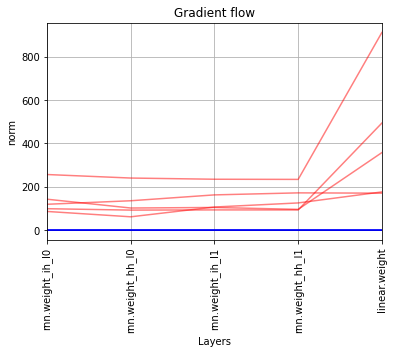

In [5]:
federated.train(5, save_results=False)

In [15]:
current_grad = {}
for n,p in federated.general_model.named_parameters():
    if p.requires_grad and 'bias' not in n:
        current_grad[n] = p.grad.cpu().numpy().copy()
current_grad

{'rnn.weight_ih_l0': array([[ 6.6249493e-05, -1.3896841e-05, -2.3706441e-06, ...,
         -1.7888754e-04,  1.1443213e-04, -1.4804071e-04],
        [-3.1599432e-04,  5.5067690e-06, -1.2704008e-04, ...,
          1.0765902e-04, -1.8637007e-04, -3.8939295e-05],
        [ 1.2881674e-04, -2.1085724e-04, -7.0842143e-06, ...,
         -1.8935621e-05, -4.8874026e-05,  6.7805355e-05],
        ...,
        [-1.9462749e-03, -5.3778116e-04,  5.5527134e-04, ...,
          3.5253162e-03,  1.9364445e-03, -8.9924532e-04],
        [ 1.3075277e-03, -1.6824988e-04,  2.5380081e-03, ...,
         -1.9805206e-04,  2.4831633e-04,  1.4323067e-03],
        [-2.3447981e-03, -8.6886263e-05, -5.5890891e-04, ...,
          3.4447783e-03, -6.7069940e-04, -1.4892058e-04]], dtype=float32),
 'rnn.weight_hh_l0': array([[ 1.23692991e-03, -3.01679916e-04, -7.81290000e-04, ...,
         -1.39325333e-04,  6.27255940e-05, -6.35906181e-04],
        [ 5.20436268e-04, -4.75383480e-04, -4.33381501e-04, ...,
          8.3580780